In [1]:
import numpy as np
!pip install pandas

In [2]:
!pip install seaborn

In [26]:
import pandas as pd
titanic_df = pd.read_csv('data/titanic.csv')

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  895 non-null    int64  
 1   Survived     895 non-null    int64  
 2   Pclass       895 non-null    int64  
 3   Name         895 non-null    object 
 4   Gender       895 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        895 non-null    int64  
 7   Parch        895 non-null    int64  
 8   Ticket       895 non-null    object 
 9   Fare         895 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     893 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.0+ KB


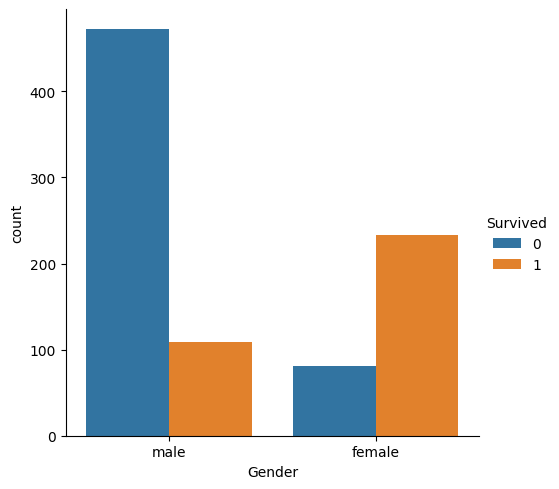

In [28]:
import seaborn as sns

sns.catplot(x="Gender", hue="Survived", kind="count", data=titanic_df)

In [29]:
titanic_df.drop(columns='Name', inplace=True)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic_df.drop(columns=['Cabin', 'Ticket', 'Embarked'], inplace=True)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [31]:
titanic_df[titanic_df.duplicated()]

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
891,891,0,3,male,32.0,0,0,7.75
892,891,0,3,male,32.0,0,0,7.75
893,891,0,3,male,32.0,0,0,7.75
894,891,0,3,male,32.0,0,0,7.75


In [32]:
titanic_df.drop_duplicates(inplace=True)
titanic_df[titanic_df.duplicated()]
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
881,882,0,3,male,33.0,0,0,7.8958
882,883,0,3,female,22.0,0,0,10.5167
883,884,0,2,male,28.0,0,0,10.5000
884,885,0,3,male,25.0,0,0,7.0500
885,886,0,3,female,39.0,0,5,29.1250
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000
890,891,0,3,male,32.0,0,0,7.7500


In [33]:
# Dealing with missing data
titanic_df.isnull().head(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


<Axes: >

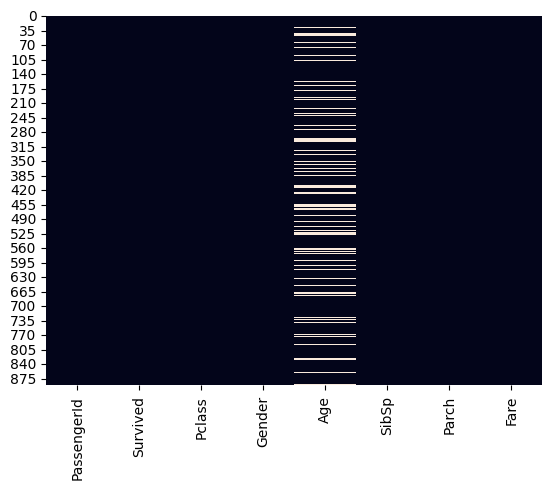

In [34]:
# Dealing with missing data
sns.heatmap(titanic_df.isnull(), cbar=False)

In [35]:
# Summary of missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [36]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df.isnull().sum()

/var/folders/vv/_thvxj657hv92knps92fmy9w0000gn/T/ipykernel_2045/3422198744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [37]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [38]:
titanic_df.head(10)
titanic_df.replace({'Gender': {'male': 0}}, inplace=True)
titanic_df.replace({'Gender': {'female': 1}}, inplace=True)

/var/folders/vv/_thvxj657hv92knps92fmy9w0000gn/T/ipykernel_2045/3355475308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df.replace({'Gender': {'female': 1}}, inplace=True)


In [39]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,7.2500
1,2,1,1,1,38.000000,1,0,71.2833
2,3,1,3,1,26.000000,0,0,7.9250
3,4,1,1,1,35.000000,1,0,53.1000
4,5,0,3,0,35.000000,0,0,8.0500
5,6,0,3,0,29.699118,0,0,8.4583
6,7,0,1,0,54.000000,0,0,51.8625
7,8,0,3,0,2.000000,3,1,21.0750
8,9,1,3,1,27.000000,0,2,11.1333
9,10,1,2,1,14.000000,1,0,30.0708


<Axes: ylabel='Fare'>

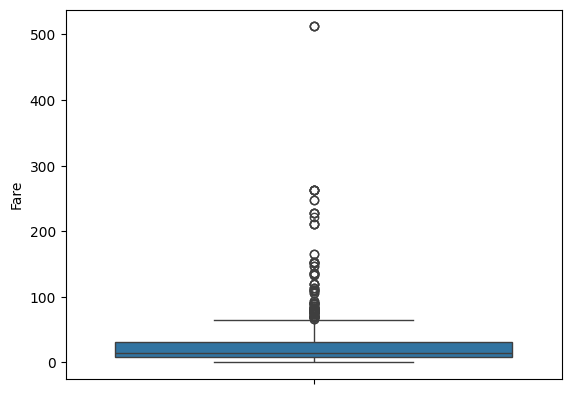

In [40]:
sns.boxplot(y=titanic_df['Fare'])

<Axes: ylabel='Fare'>

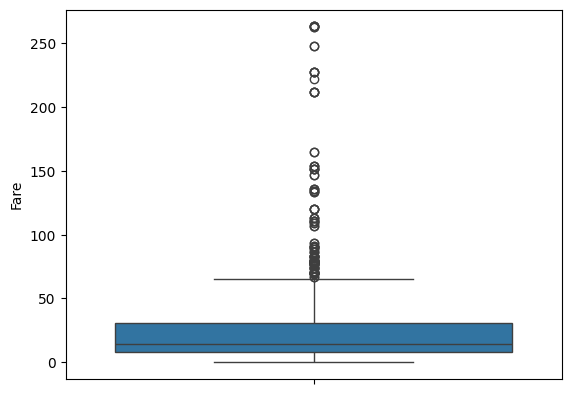

In [41]:
titanic_df.drop(titanic_df[titanic_df.Fare >= 500].index, inplace=True)
sns.boxplot(y=titanic_df['Fare'])

In [22]:
titanic_df.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,0.410853,2.248062,0.374677,29.798243,0.529716,0.419897,33.082913
std,0.492307,0.852947,0.484352,13.754245,0.990783,0.840850,43.149755
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,0.000000,29.819614,0.000000,0.000000,15.950000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [23]:
from sklearn.preprocessing import MinMaxScaler

scala = MinMaxScaler()
titanic_df[['Fare']] = scala.fit_transform(titanic_df[['Fare']])
titanic_df.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,0.410853,2.248062,0.374677,29.798243,0.529716,0.419897,0.125791
std,0.492307,0.852947,0.484352,13.754245,0.990783,0.840850,0.164068
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.030608
50%,0.000000,3.000000,0.000000,29.819614,0.000000,0.000000,0.060646
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,0.128862
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000


<Axes: >

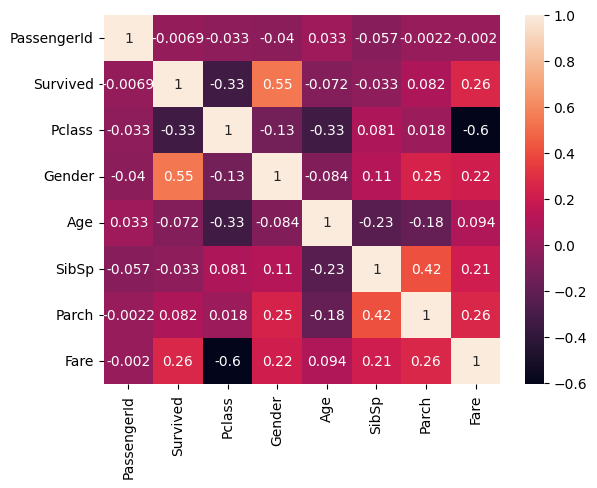

In [42]:
sns.heatmap(titanic_df.corr(), annot=True)

In [44]:
x_columns = ['PassengerId', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare']
y_columns = 'Survived'
X = titanic_df[x_columns]
Y = titanic_df[y_columns]

import numpy as np
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(888, 7)
(888,)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False, random_state=333)
print(X_test, X_test, y_train, y_test)

[[623.       3.       0.     ...   1.       1.      15.7417]
 [624.       3.       0.     ...   0.       0.       7.8542]
 [625.       3.       0.     ...   0.       0.      16.1   ]
 ...
 [889.       3.       1.     ...   1.       2.      23.45  ]
 [890.       1.       0.     ...   0.       0.      30.    ]
 [891.       3.       0.     ...   0.       0.       7.75  ]] [[623.       3.       0.     ...   1.       1.      15.7417]
 [624.       3.       0.     ...   0.       0.       7.8542]
 [625.       3.       0.     ...   0.       0.      16.1   ]
 ...
 [889.       3.       1.     ...   1.       2.      23.45  ]
 [890.       1.       0.     ...   0.       0.      30.    ]
 [891.       3.       0.     ...   0.       0.       7.75  ]] [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 

[Text(0.45689655172413796, 0.9, 'Gender <= 0.5\ngini = 0.477\nsamples = 621\nvalue = [377.0, 244.0]\nclass = UnSurvived'),
 Text(0.1896551724137931, 0.7, 'Age <= 13.5\ngini = 0.3\nsamples = 391\nvalue = [319, 72]\nclass = UnSurvived'),
 Text(0.06896551724137931, 0.5, 'SibSp <= 2.5\ngini = 0.497\nsamples = 24\nvalue = [11, 13]\nclass = Survived'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Survived'),
 Text(0.10344827586206896, 0.3, 'PassengerId <= 222.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = UnSurvived'),
 Text(0.06896551724137931, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = UnSurvived'),
 Text(0.13793103448275862, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = UnSurvived'),
 Text(0.3103448275862069, 0.5, 'Pclass <= 1.5\ngini = 0.27\nsamples = 367\nvalue = [308.0, 59.0]\nclass = UnSurvived'),
 Text(0.2413793103448276, 0.3, 'PassengerId <= 586.0\ngini = 0.424\nsamples = 82\nvalue = [57.0, 25.0]\nclass = UnSurv

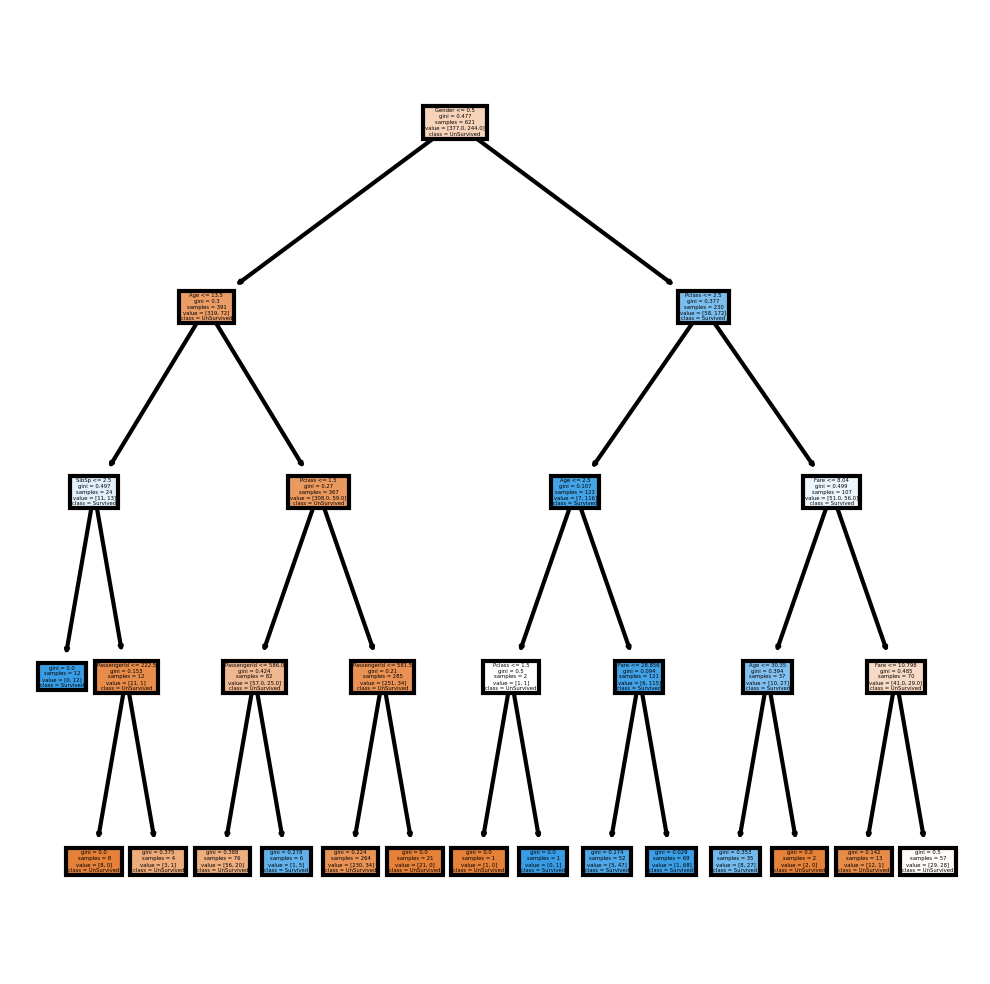

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cn = ['UnSurvived', 'Survived']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)

tree.plot_tree(clf, feature_names=x_columns, class_names=cn, filled=True)

In [48]:
# 평가
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)

print("Acc: {}%".format(np.round(acc * 100, 3)))

Acc: 82.022%


In [49]:
x_columns = ['Pclass', 'Gender', 'Age', 'Parch', 'Fare']
X = scala.fit_transform(titanic_df[x_columns])
print(X[:5,:])
print(X.shape)

[[1.         0.         0.27117366 0.         0.02756654]
 [0.         1.         0.4722292  0.         0.27103916]
 [1.         1.         0.32143755 0.         0.03013308]
 [0.         1.         0.43453129 0.         0.20190114]
 [1.         0.         0.43453129 0.         0.03060837]]
(888, 5)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False, random_state=333)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Acc: {}%".format(np.round(acc * 100, 3)))

(621, 5) (267, 5) (621,) (267,)
Acc: 83.895%
